In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

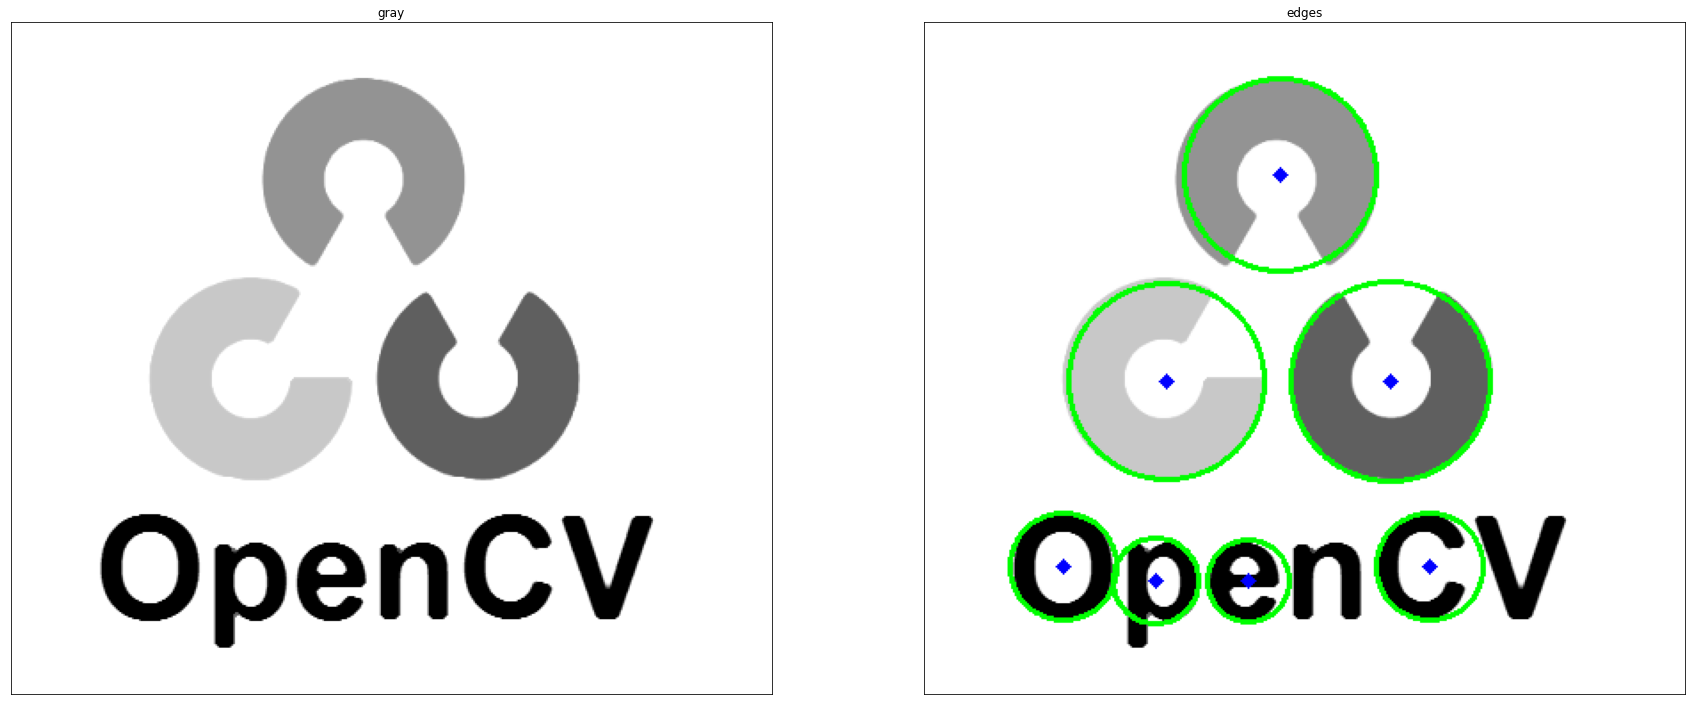

In [4]:
img = cv2.imread('opencv_logo.png',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
plt.figure(figsize=(30,45))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cimg,cmap = 'gray')
plt.title('edges'), plt.xticks([]), plt.yticks([])
plt.show()


In [12]:
img = cv2.imread('opencv_logo.png',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

In [13]:
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,param1=350,param2=50,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))

In [14]:
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

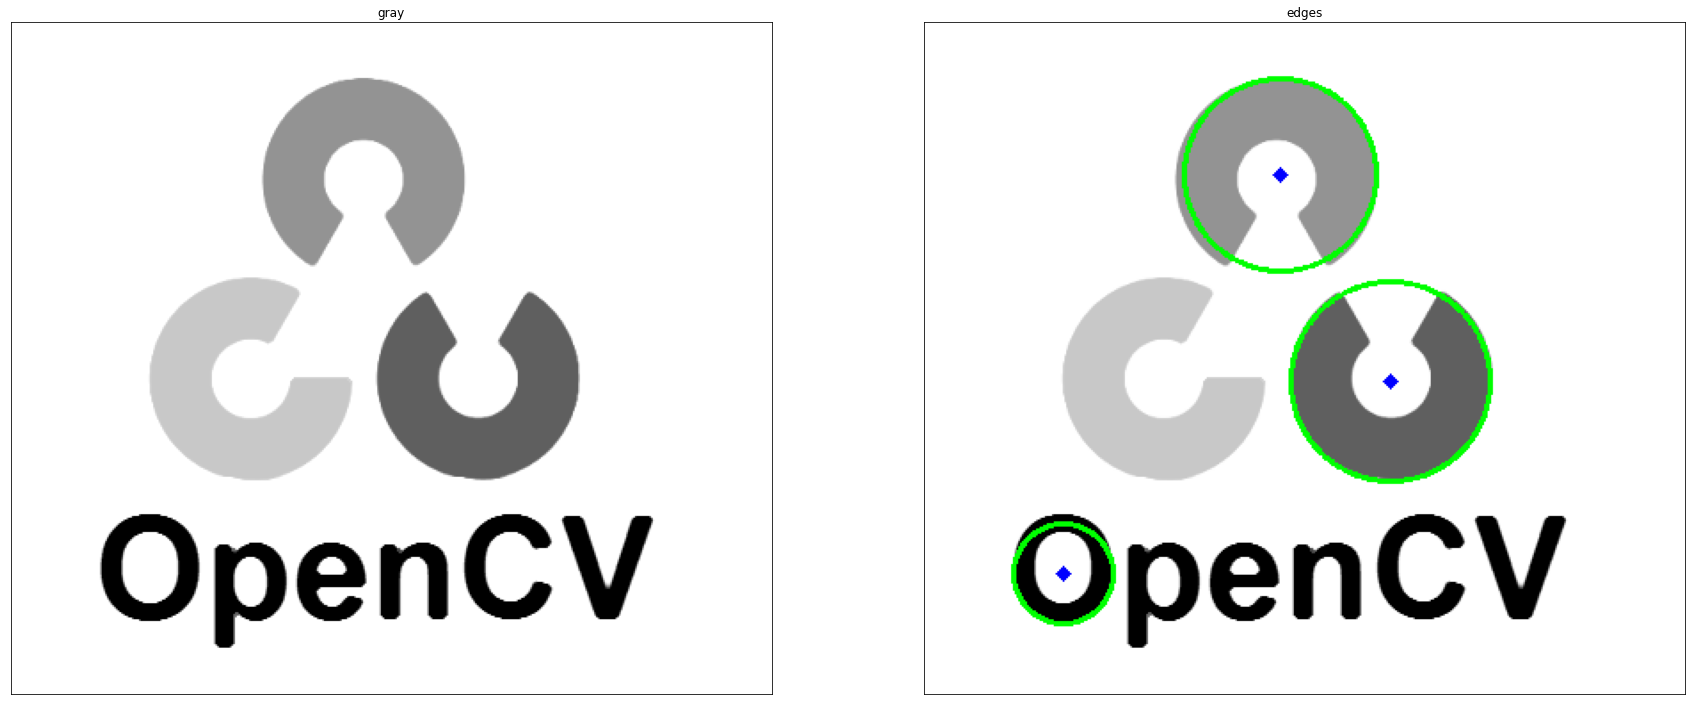

In [15]:
plt.figure(figsize=(30,45))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cimg,cmap = 'gray')
plt.title('edges'), plt.xticks([]), plt.yticks([])
plt.show()

In [17]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [18]:
img = cv2.imread('coins.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

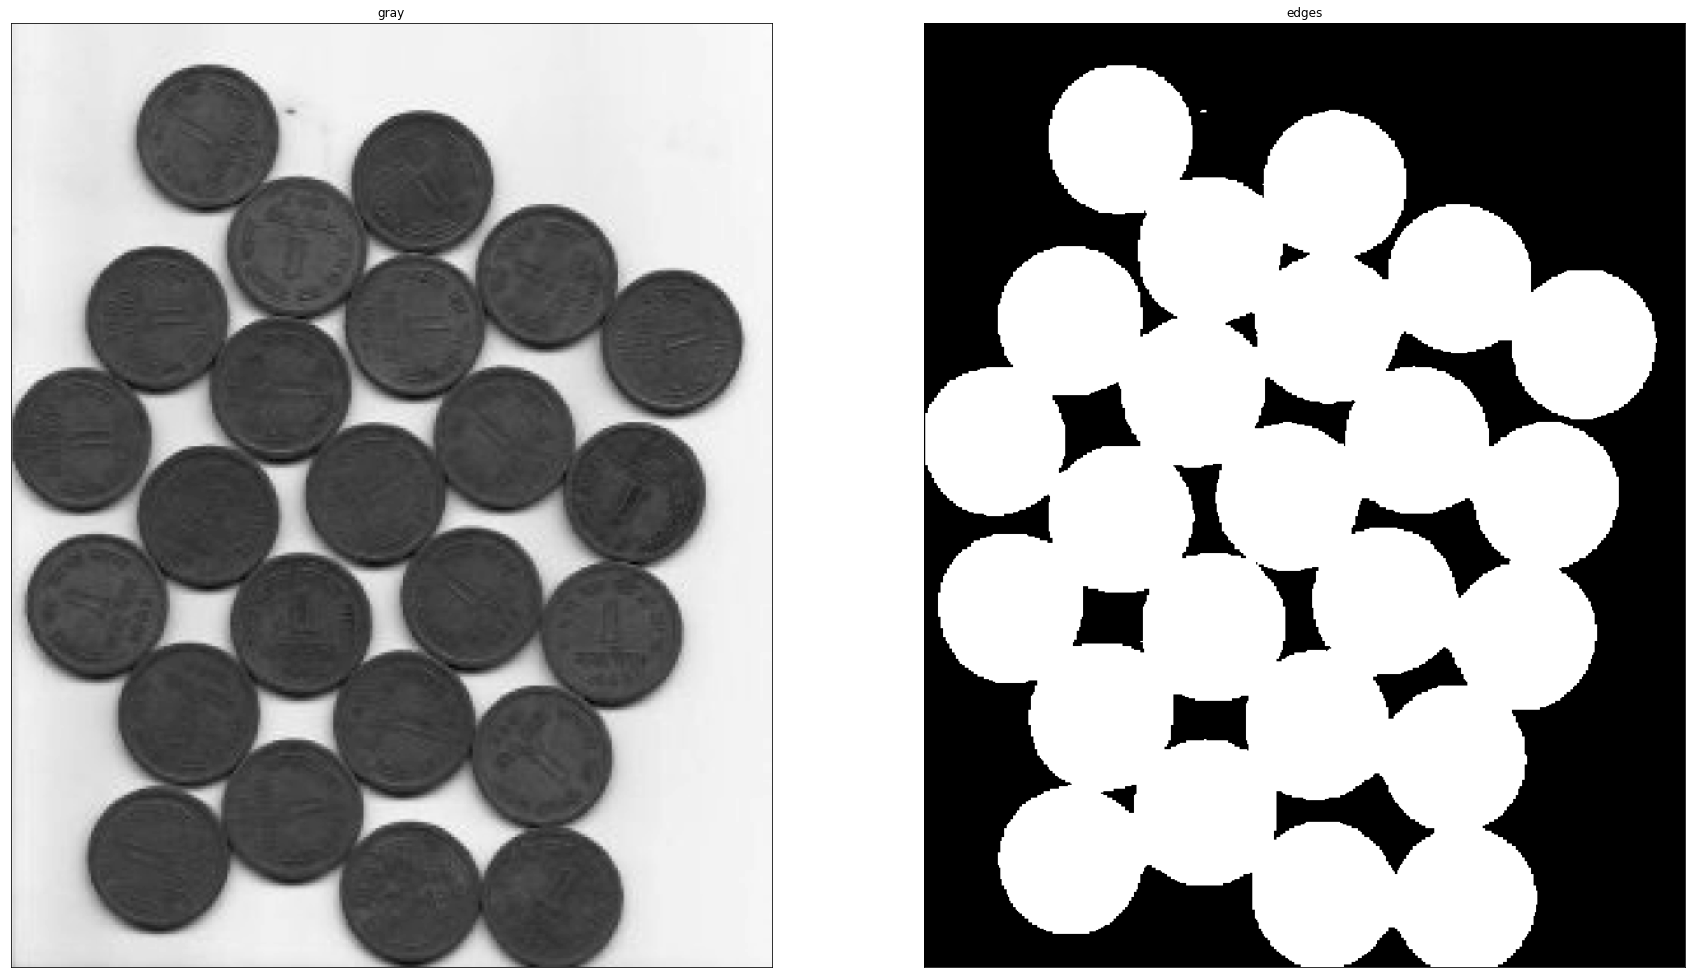

In [19]:
plt.figure(figsize=(30,45))
plt.subplot(121),plt.imshow(gray,cmap = 'gray')
plt.title('gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh,cmap = 'gray')
plt.title('edges'), plt.xticks([]), plt.yticks([])
plt.show()

In [20]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

In [21]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

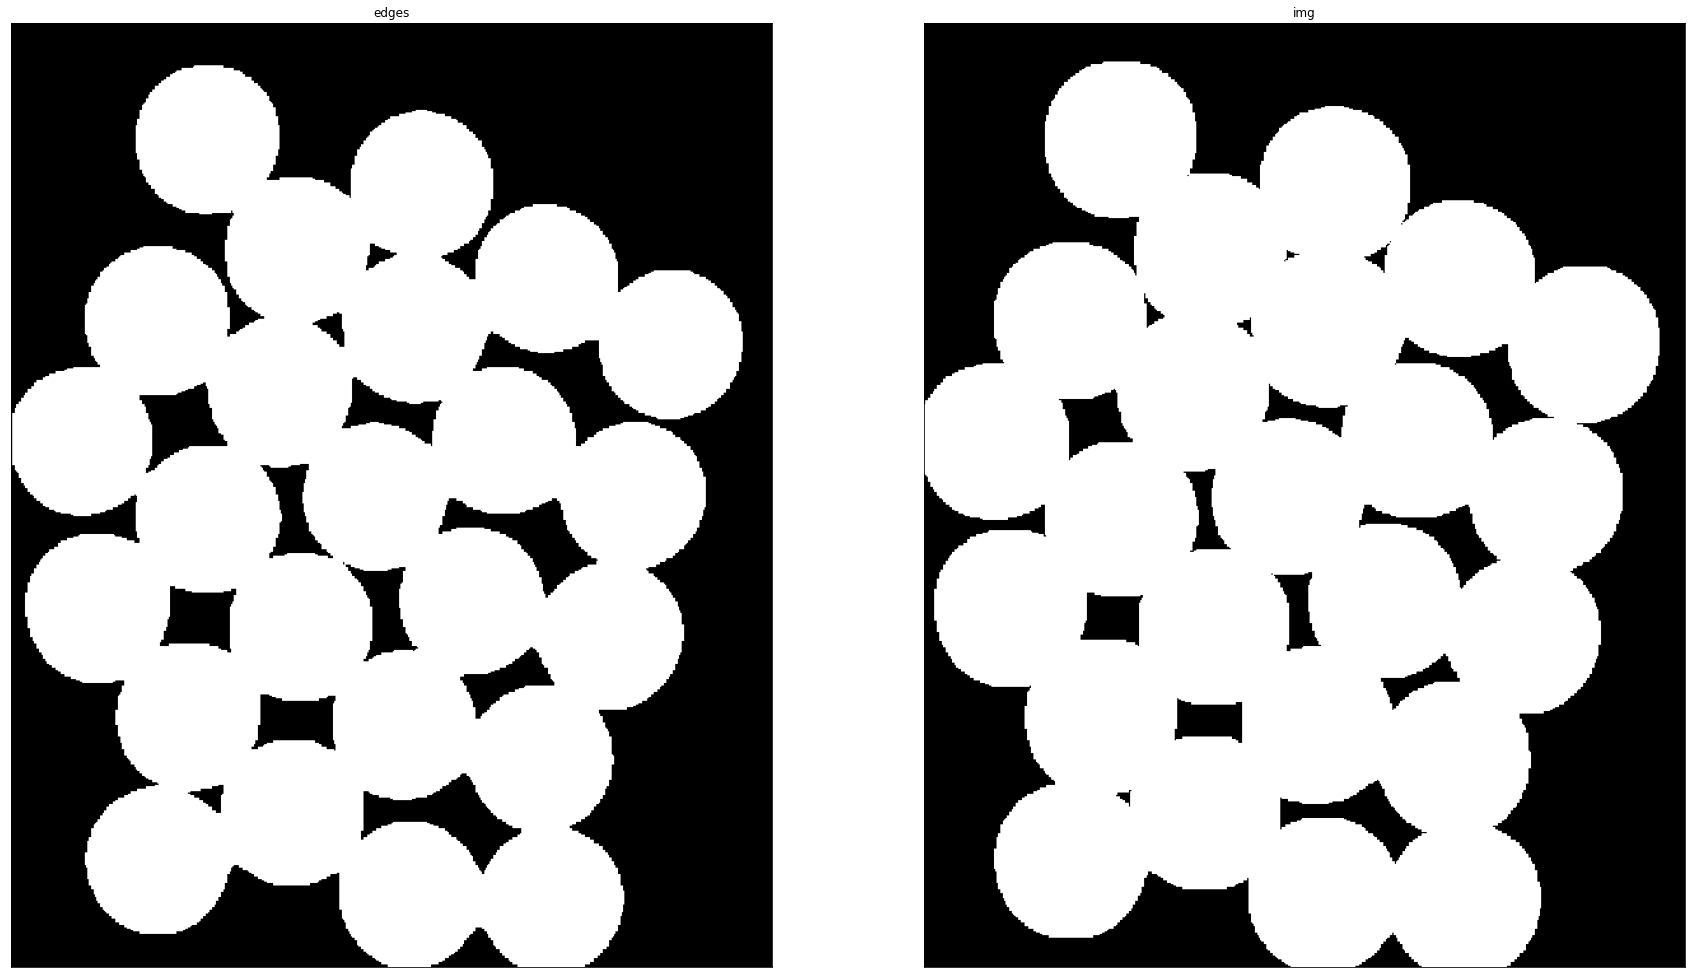

In [22]:
plt.figure(figsize=(30,45))
plt.subplot(121),plt.imshow(opening,cmap = 'gray')
plt.title('edges'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sure_bg,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.show()

In [27]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

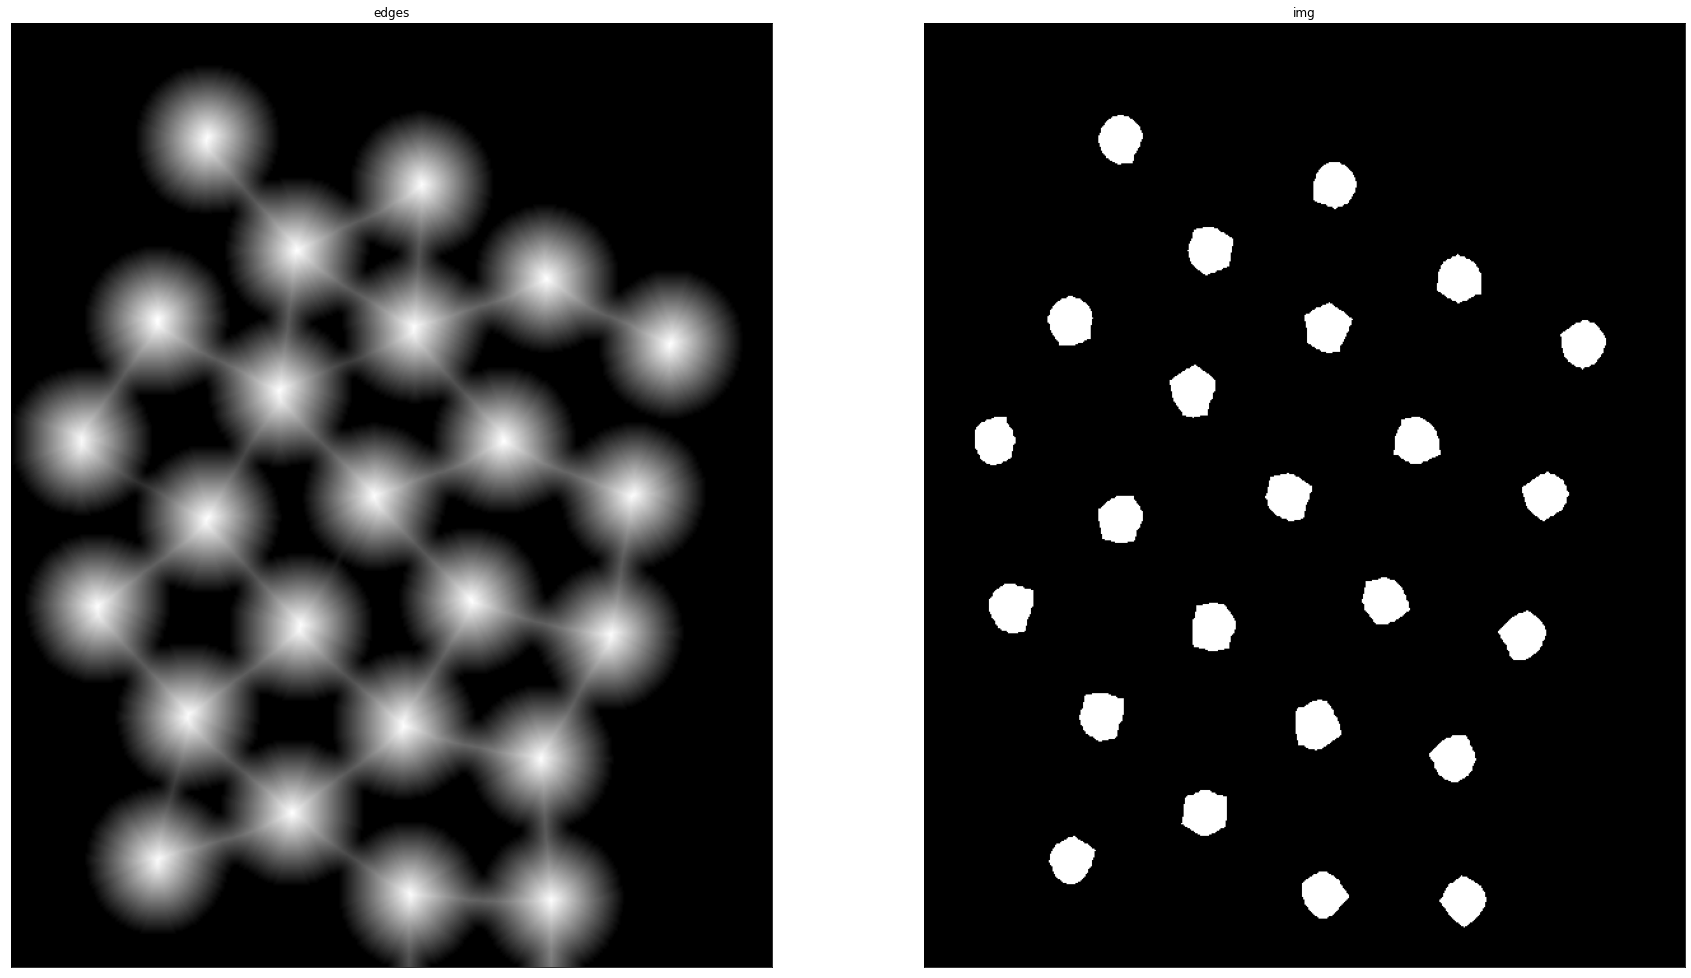

In [29]:
plt.figure(figsize=(30,45))
plt.subplot(121),plt.imshow(dist_transform,cmap = 'gray')
plt.title('edges'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sure_fg,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.show()

In [30]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

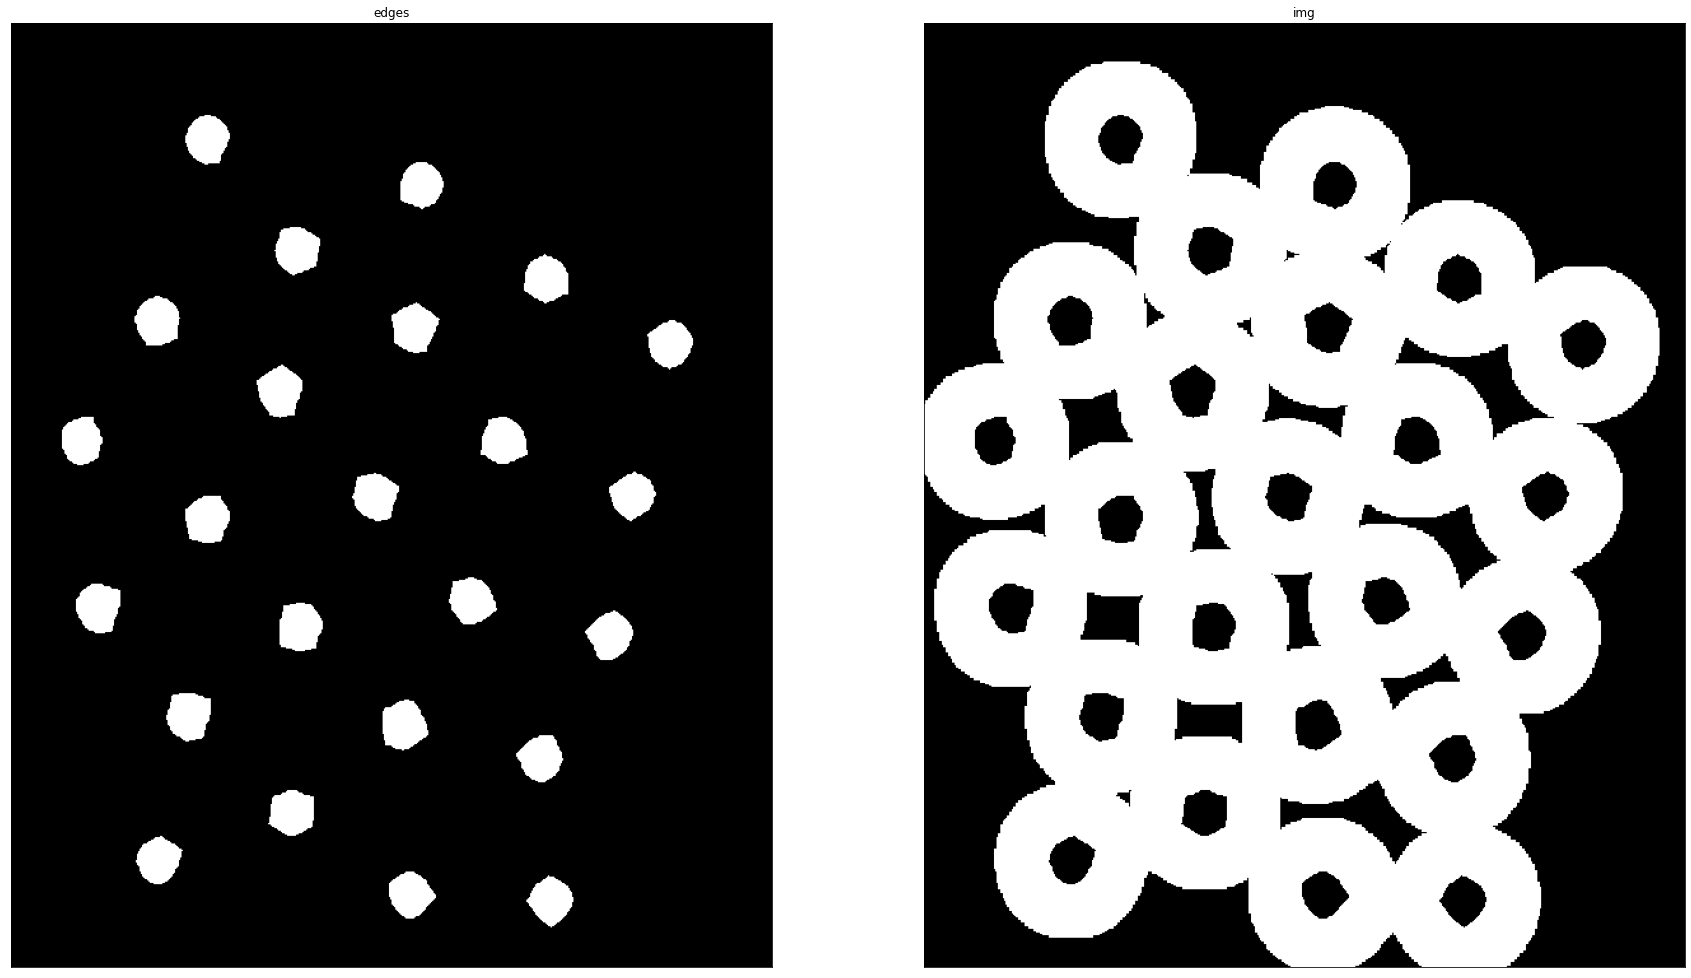

In [31]:
plt.figure(figsize=(30,45))
plt.subplot(121),plt.imshow(sure_fg,cmap = 'gray')
plt.title('edges'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(unknown,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.show()

In [32]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [33]:
markers.shape

(742, 598)

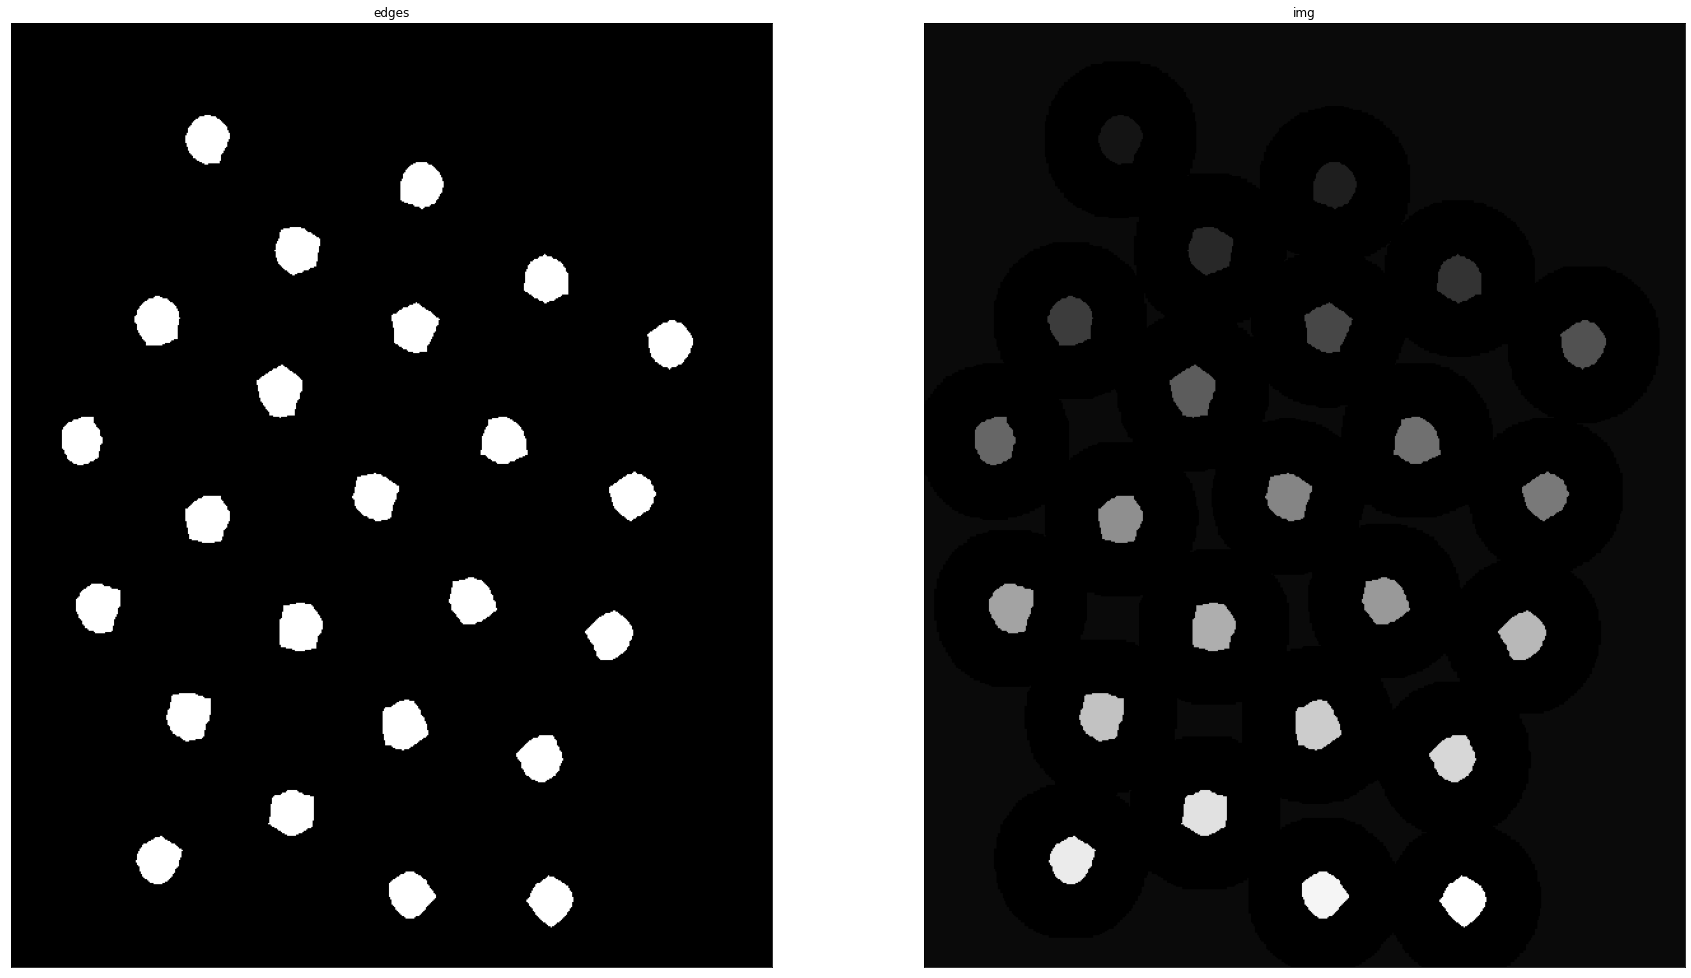

In [34]:
plt.figure(figsize=(30,45))
plt.subplot(121),plt.imshow(sure_fg,cmap = 'gray')
plt.title('edges'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(markers,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.show()

In [35]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

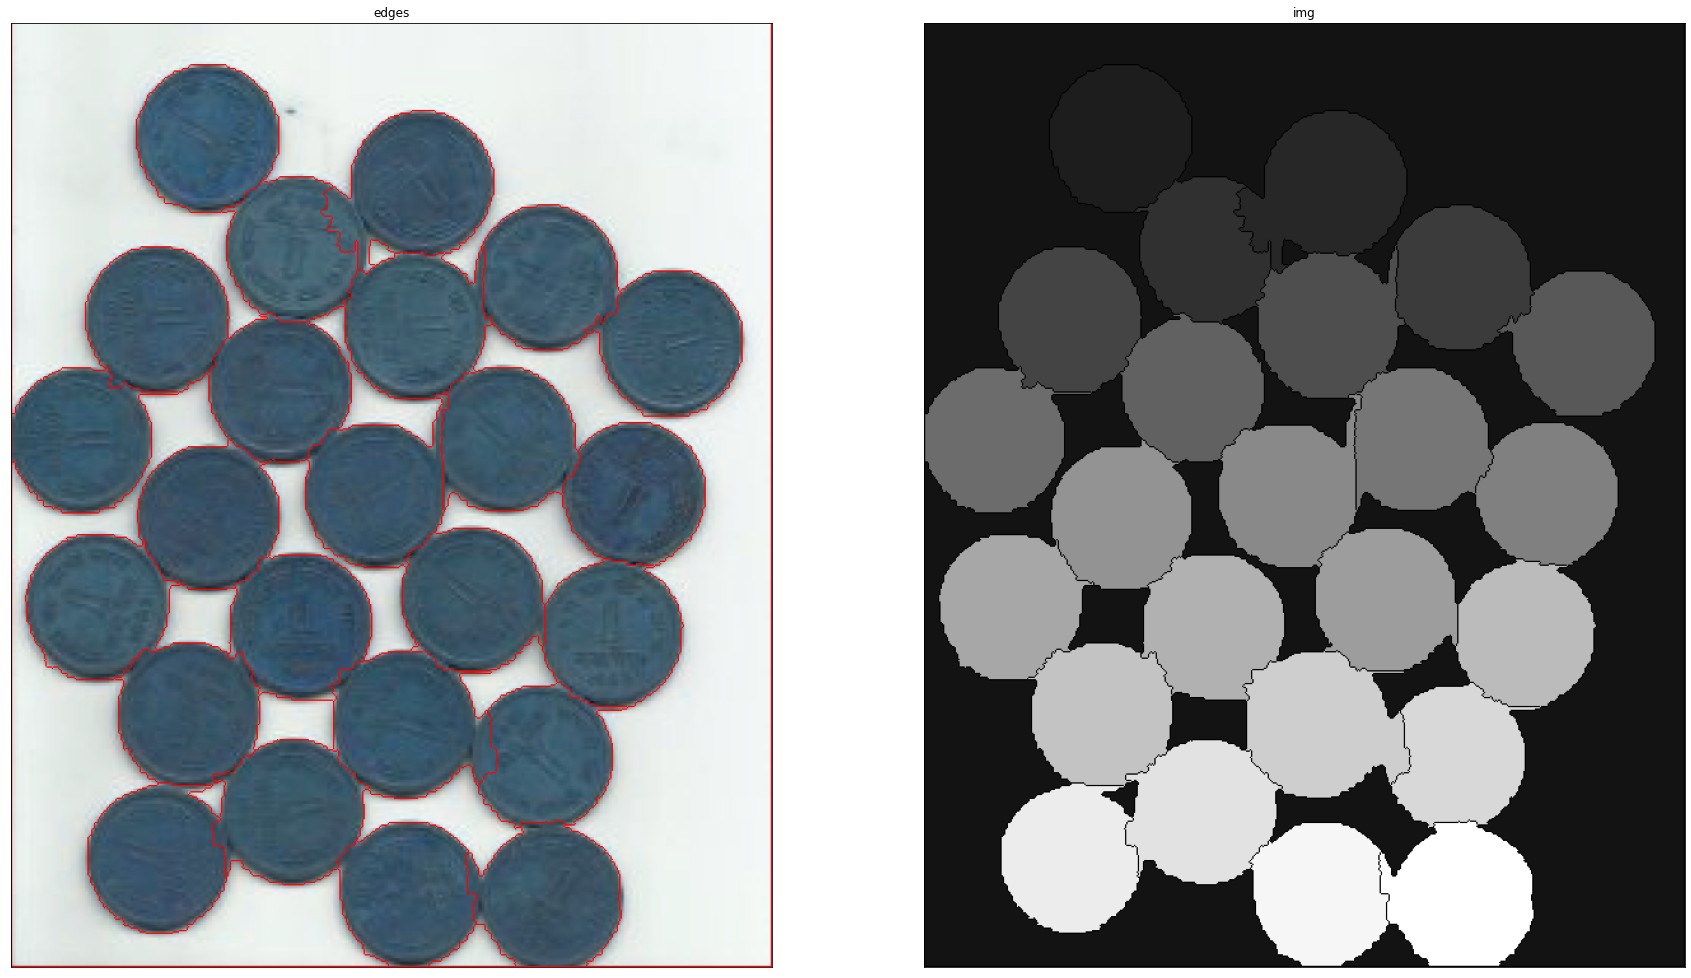

In [36]:
plt.figure(figsize=(30,45))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('edges'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(markers,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.show()